# Unsupervised Learning - Clustering Using K-Means (Học không giám sát - Phân cụm K-means)


K-Means clustering là một loại học tập không giám sát:
- Được sử dụng khi bạn có dữ liệu chưa được gắn nhãn.
- Mục tiêu là tìm các nhóm trong dữ liệu, với số lượng nhóm được đại diện bởi K.

Mục tiêu của phân cụm K-Means là đạt được những điều sau:
- K centroid đại diện cho trung tâm của các cụm.
- Nhãn cho dữ liệu đào tạo.

## Implementing K-Means in Python - Triển khai K-Means trong Python

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

Tải tệp CSV vào khung dữ liệu Pandas và vẽ biểu đồ phân tán hiển
thị các điểm:

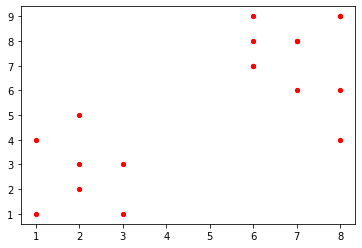

In [ ]:
dataFrame = pd.read_csv("kmeans.csv")
plt.scatter(
    dataFrame['x'], 
    dataFrame['y'], 
    c = 'r', 
    s = 18
)


### Create centroids - Tạo các điểm trọng tâm

Giả sử k = 3, ta sẽ cần tạo ra 3 điểm trọng tâm của 3 nhóm ở vị trí bất kỳ:

In [ ]:
k = 3

Tạo một ma trận chứa tất cả các điểm:

In [ ]:
X = np.array(list(
      zip(
          dataFrame['x'],
          dataFrame['y']
      )
    ))

In [ ]:
print(X)

[[1 1]
 [2 2]
 [2 3]
 [1 4]
 [3 3]
 [6 7]
 [7 8]
 [6 8]
 [7 6]
 [6 9]
 [2 5]
 [7 8]
 [8 9]
 [6 7]
 [7 8]
 [3 1]
 [8 4]
 [8 6]
 [8 9]]


Sinh ra k trọng tâm ở các vị trí bất kỳ:

In [ ]:
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)

Biểu diễn k trọng tâm dưới dạng ma trận:

In [ ]:
C = np.array(
        list(zip(Cx, Cy)), 
        dtype=np.float64
    )
print(C)

[[6. 2.]
 [5. 3.]
 [6. 2.]]


Vẽ đồ thị tất cả các điểm:

Text(0, 0.5, 'y')

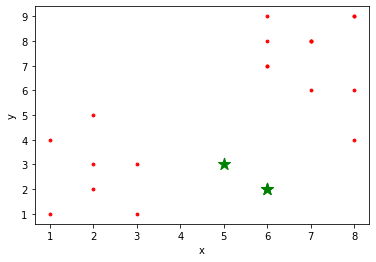

In [ ]:
plt.scatter(dataFrame['x'], dataFrame['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")

### K-means algorithm implement - Triển khai thuật toán K-means

Thêm function `deepcopy` để có thể sao chép dữ liệu đối tượng:

In [ ]:
from copy import deepcopy

Định nghĩa một function tính khoảng cách Euclid giữa điểm `point` và các điểm `others`:

In [ ]:
def euclidean_distance(point, others, ax=1):
    return np.linalg.norm(point - others, axis=ax)

Tạo ma trận lưu C cũ để có thể tính độ lệch sau mỗi bước lần lặp thuật toán:

In [ ]:
C_prev = np.zeros(C.shape)

Tạo list lưu nhóm mà các điểm thuộc về:

In [ ]:
clusters = np.zeros(len(X))

Đo khoảng cách của các trọng tâm giữa vị trí hiện tại và vị trí cũ:

In [ ]:
distance_differences = euclidean_distance(C, C_prev)

Lặp cho tới khi các điểm trọng tâm không còn thay đổi vị trí nữa:

In [ ]:
while distance_differences.any() != 0:
    # Gán nhóm cho từng điểm:
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
        # Trả về chỉ số của giá trị khoảng cách nhỏ nhất trong dãy giá trị tính được:
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Sau khi kết thúc, lưu trữ vị trí của các điểm trong C:
    C_prev = deepcopy(C)
    # Tìm các vị trí trọng tâm mới:
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)
    distance_differences = euclidean_distance(C, C_prev)

Vẽ biểu đồ phân tán:

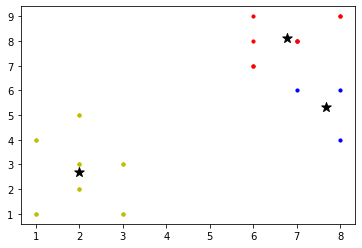

In [ ]:
colors = ['b', 'r', 'y', 'g', 'c', 'm']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else: # Nhóm này không chứa điểm nào
        print("Plesae regenerate your centroids again.")
        
plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

### Use K-means in Scikit-learn - Sử dụng K-means trong Scikit-learn

Thay vì dựng thuật toán K-means bằng tay, ta có thể sử dụng class `KMeans` trong thư viện Scikit-learn:

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)

Đào tạo model:

In [ ]:
kmeans = kmeans.fit(X)

Gán nhãn cho các điểm:

In [ ]:
labels = kmeans.predict(X)

Lấy các điểm trọng tâm:

In [ ]:
centroids = kmeans.cluster_centers_

Kết quả:

In [ ]:
print(labels)
print(centroids)

[1 1 1 1 1 0 0 0 2 0 1 0 0 0 0 1 2 2 0]
[[6.77777778 8.11111111]
 [2.         2.71428571]
 [7.66666667 5.33333333]]


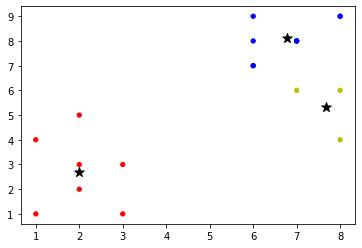

In [ ]:
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(dataFrame['x'], dataFrame['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

## Evaluating Cluster Size Using the Silhouette Coefficient - Đánh giá kích thước cụm bằng hệ số Silhouette

Để xác định giá trị cho k sao cho tối ưu, ta cần sử dụng hệ số Silhouette.

Các hệ số này là thước đo chất lượng phân cụm mà ta đạt được.

Nó đo lường sự gắn kết cụm, là không gian giữa các cụm.

Phạm vi giá trị cho hệ số Silhouette nằm trong khoảng –1 đến 1.

Công thức Hệ số Silhouette được đưa ra như sau: $1 - (a/b)$

Với:
- a là khoảng cách trung bình của một điểm đến tất cả các điểm khác trong cùng
một cụm. Nếu a nhỏ, sự liên kết cụm tốt, vì tất cả các điểm đều gần nhau.
- b là khoảng cách trung bình nhỏ nhất của một điểm đến tất cả các điểm khác
trong cụm gần nhất. Nếu b lớn, tách cụm là tốt, vì cụm gần nhất cách xa nhau.

Nếu a nhỏ và b lớn, hệ số Silhouette cao. Giá trị của k mang lại bởi hệ số Silhouette cao nhất được gọi là k tối ưu.

### Triển khai qua `sklearn`

#### Tìm hệ số Silhouette:

In [ ]:
from sklearn import metrics

silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)

print(silhouette_samples)
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.33332111
 0.63792468 0.58821402 0.29141777 0.59137721 0.50802377 0.63792468
 0.52511161 0.33332111 0.63792468 0.60168807 0.51664787 0.42831295
 0.52511161]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.5578051985195768


#### Tìm k tối ưu:

In [ ]:
silhouette_avgs = []
min_k = 2

Thử k từ 2 cho tới số nhãn tối đa có thể có:

In [ ]:
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

Silhouette Coefficients for k = 2 is 0.6897112069939448
Silhouette Coefficients for k = 3 is 0.5578051985195768
Silhouette Coefficients for k = 4 is 0.4430381814640289
Silhouette Coefficients for k = 5 is 0.45599458528403614
Silhouette Coefficients for k = 6 is 0.40864774283903305
Silhouette Coefficients for k = 7 is 0.4024852557170878
Silhouette Coefficients for k = 8 is 0.43678049756166826
Silhouette Coefficients for k = 9 is 0.4477506360741836
Silhouette Coefficients for k = 10 is 0.5124113408422506
Silhouette Coefficients for k = 11 is 0.4695564671186216
Silhouette Coefficients for k = 12 is 0.4409831398126504
Silhouette Coefficients for k = 13 is 0.4255677072435213
Silhouette Coefficients for k = 14 is 0.383836485200708
Silhouette Coefficients for k = 15 is 0.3684210526315789
Silhouette Coefficients for k = 16 is 0.3684210526315789


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  


Silhouette Coefficients for k = 17 is 0.3684210526315789
Silhouette Coefficients for k = 18 is 0.3684210526315789


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  


Biểu diễn qua đồ thị:

Text(0, 0.5, 'Silhouette Coefficients')

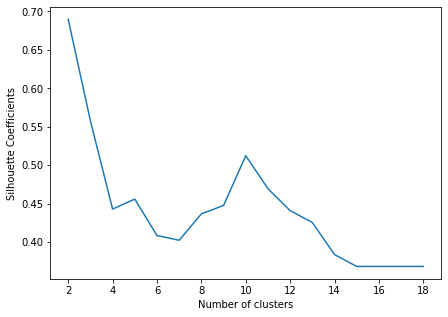

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

Giá trị k tối ưu sẽ là giá trị k khi hệ số Silhouette cao nhất:

In [ ]:
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)

Optimal K is 2


## Using K-Means to Solve Real-Life Problems - Sử dụng K-Means để giải quyết các vấn đề ngoài đời

Giả sử bạn là một nhà thiết kế quần áo và bạn được giao nhiệm vụ thiết kế một loạt quần short Bermuda mới. Một trong những vấn đề thiết kế là bạn cần phải đưa ra một loạt các kích thước sao cho phù hợp với hầu hết mọi người. Về cơ bản, bạn cần có một loạt quy mô của những người khác nhau:
- Waist Circumference (chu vi vòng eo).
- Upper Leg Length (chiều dài chân trên).

Điều đầu tiên bạn cần làm là nắm được tập dữ liệu chứa các số đo của một nhóm người (ở một độ tuổi nhất định). Sử dụng tập dữ liệu này, bạn có thể áp dụng thuật toán K-Means để nhóm những người này thành các cụm dựa trên số đo cụ thể của các bộ phận cơ thể của họ. Khi các cụm được tìm thấy, bây giờ bạn sẽ có một bức tranh rất rõ ràng về các kích thước mà bạn cần thiết kế.

Data source: https://data.world/rhoyt/body-measurements

Các cột cần trong dữ liệu:
- BMXWAIST: Waist Circumference (cm).
- BMXLEG: Upper Leg Length (cm)

### Import Libraries and load data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("BMX_G.csv")

### Cleaning the data

In [ ]:
# Check:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

Loại bỏ những hàng bị thiếu giá trị ở 2 cột ta cần:

In [ ]:
df = df.dropna(subset=['bmxleg','bmxwaist'])
print(df.shape)

(6899, 27)


### Plotting the Scatter Plot - Vẽ biểu đồ phân tán

Text(0, 0.5, 'Waist Circumference (cm)')

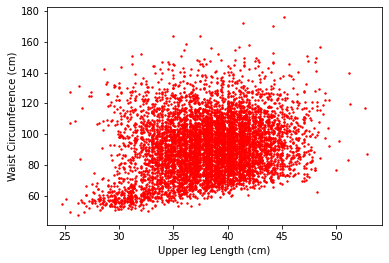

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['bmxleg'],df['bmxwaist'], c='r', s=2)
plt.xlabel("Upper leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")

### Clustering Using K-Means - Phân cụm bằng K-Means

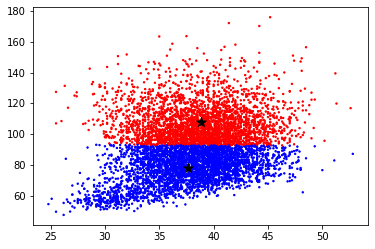

In [ ]:
from sklearn.cluster import KMeans
k = 2
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

### Get results - Lấy kết quả

In [ ]:
print(centroids)

[[ 37.6544592   77.88026565]
 [ 38.82445483 107.96137072]]


Điều này có nghĩa là bây giờ bạn có thể thiết kế quần short Bermuda của mình với các kích thước sau:
- Vòng eo 77.8 cm, chiều dài chân trên 37.7 cm
- Vòng eo 107.9 cm, chiều dài chân trên 38.8 cm